In [5]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [7]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [8]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [9]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [10]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [11]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([0.42038518, 0.36658707], dtype=float32),
 array([1.2550308], dtype=float32)]

In [12]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([-0.39571223], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [13]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:3.377521514892578, W:[0.62587994], b:[0.13999258]
200번째 cost:0.018687671050429344, W:[1.1583902], b:[0.6399418]
400번째 cost:0.007135868072509766, W:[1.0978756], b:[0.77750593]
600번째 cost:0.0027248177211731672, W:[1.0604811], b:[0.86251223]
800번째 cost:0.0010404769564047456, W:[1.0373738], b:[0.91504073]
1000번째 cost:0.0003973048587795347, W:[1.0230948], b:[0.9475003]
1200번째 cost:0.00015170808183029294, W:[1.0142711], b:[0.96755856]
1400번째 cost:5.7931250921683386e-05, W:[1.0088187], b:[0.9799528]
1600번째 cost:2.2122054360806942e-05, W:[1.0054497], b:[0.98761195]
1800번째 cost:8.447436812275555e-06, W:[1.0033675], b:[0.99234486]
2000번째 cost:3.2259424642688828e-06, W:[1.0020812], b:[0.99526936]
2200번째 cost:1.2322342399784247e-06, W:[1.0012863], b:[0.9970763]
2400번째 cost:4.709628740329208e-07, W:[1.0007954], b:[0.99819255]
2600번째 cost:1.802076639023653e-07, W:[1.0004921], b:[0.998882]
2800번째 cost:6.904081573111398e-08, W:[1.0003048], b:[0.999308]
3000번째 cost:2.6548988785179972e-08, W:[1

In [14]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [15]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [16]:
def predict(x):
    return W_[0]*x + b_[0]

In [17]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?


ValueError: invalid literal for int() with base 10: ''

## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [ ]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

In [ ]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# tensor 그래프
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

In [ ]:
# 예측하기
sess.run(H, feed_dict={x:5})

In [ ]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [ ]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                      X - Xmin
    normalization = ────────────
                     Xmax - Xmin
         * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
         
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ──────────────────
                          Xstd(표준편차)
          * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [ ]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

In [ ]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

In [ ]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

In [ ]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

In [ ]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [ ]:
# 라이브러리를 쓰고 표준화 (StandardScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

In [ ]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

In [ ]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv->array)

In [ ]:
# 방법1 : csv -> array
import numpy as np
#data = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8') # 결측치, header가 없어야 함
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
data[:5]

In [ ]:
# 방법2 : csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
# 1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv')
data.info() # Ozone, Solar.R 열에만 결측치
data.isna().sum() # 열별 결측치 갯수

In [ ]:
# 2. 결측치처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

In [ ]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

In [18]:
def fill_nan(row):
    #print(row)
    #print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    #if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True 
    # row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [19]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타겟변수
X_data.shape, y_data.shape

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [20]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

ValueError: Cannot feed value of shape (7, 2) for Tensor Placeholder:0, which has shape (?, 3)

In [ ]:
np.column_stack([X_data, y_data])[:3]

In [21]:
# 예측하기
input_data = np.array([[118. ,   8. ,  72.]])
sess.run(H, feed_dict={X:input_data})

array([[-152.34015]], dtype=float32)

### 스케일 조정
```
  MinMaxScaler, StandardScaler
    0~1        -2 ~ 2. 주로 0근처
```

In [22]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((7, 2), (7, 1))

In [23]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[1.        , 0.        , 1.        ],
       [0.77777778, 0.33333333, 1.        ]])

In [24]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 30001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

ValueError: Cannot feed value of shape (7, 2) for Tensor Placeholder_2:0, which has shape (?, 3)

In [25]:
# 예측하기
input_data = np.array([[190. ,   7.4,  67. ]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

ValueError: X has 3 features, but MinMaxScaler is expecting 2 features as input.

# 3. 이진분류 = logistic Regression (분류분석)
- logistic 회귀분석 : 기본의 회귀분석과 다른 처리 필요

In [ ]:
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

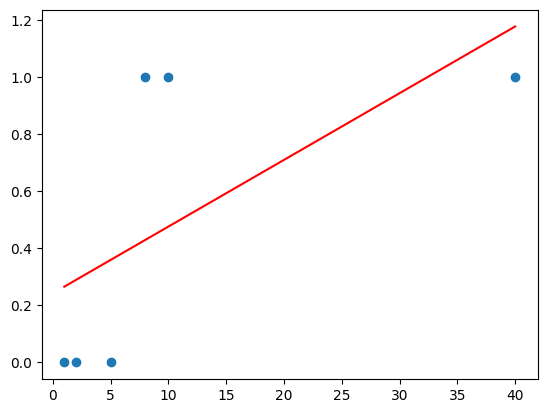

In [26]:
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [27]:
# 교안 50pt
import numpy as np
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
#cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.21083137392997742
1600번째 cost:0.1658022254705429
2400번째 cost:0.13986633718013763
3200번째 cost:0.12121199816465378
4000번째 cost:0.10680597275495529
4800번째 cost:0.09529144316911697
5600번째 cost:0.08588326722383499
6400번째 cost:0.0780666396021843
7200번째 cost:0.07148231565952301
8000번째 cost:0.0658702626824379


In [28]:
# 모델 사용
input_data = np.array([[5, 2]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [13]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


# 4. XOR

In [30]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개 W, b
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.4448575973510742
1000번째 cost:0.6955960988998413
2000번째 cost:0.6939496397972107
3000번째 cost:0.6935092210769653
4000번째 cost:0.6933112144470215
5000번째 cost:0.6932216882705688
6000번째 cost:0.6931810975074768
7000번째 cost:0.6931626200675964
8000번째 cost:0.6931542158126831


In [31]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 0.75


# 5. Deep Learning XOR 예제

In [38]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : (입력2, 출력4)
W1 = tf.Variable(tf.random.normal([2, 4]))
b1 = tf.Variable(tf.random.normal([4]))
# H
layer1= tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : (입력4, 출력1)
W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(layer1, W2) + b2
H      = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:0.8917282819747925
1000번째 cost:0.4919438064098358
2000번째 cost:0.4529787302017212
3000번째 cost:0.3425459861755371
4000번째 cost:0.15076479315757751
5000번째 cost:0.08912856876850128
6000번째 cost:0.06278955936431885
7000번째 cost:0.04789961129426956
8000번째 cost:0.03842828795313835
9000번째 cost:0.031881704926490784
10000번째 cost:0.027144646272063255


In [39]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


## layer 층 x_data 2개 -> 4 -> 1을 
## layer층 x_data 2개 -> 10 -> 20 -> 10 -> 1
                         입력층   hidden layer(relu)  출력층(sigmoid)

In [41]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1(입력층 relu) : 입력 2, 출력 10
W1 = tf.Variable(tf.random.normal([2, 10]))
b1 = tf.Variable(tf.random.normal([10]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2(은닉층 relu) : 입력 10, 출력 20
W2 = tf.Variable(tf.random.normal([10, 20]))
b2 = tf.Variable(tf.random.normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3(은닉층 relu) : 입력 20, 출력10
W3 = tf.Variable(tf.random.normal([20, 10]))
b3 = tf.Variable(tf.random.normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4(출력층 이진분류에서는sigmoid, 일반분류에서는 softmax) : 입력 10, 출력1
W4 = tf.Variable(tf.random.normal([10, 1]))
b4 = tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(301):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%50==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.4058481454849243
50번째 cost:0.024565834552049637
100번째 cost:0.012601304799318314
150번째 cost:0.008536589331924915
200번째 cost:0.0064306859858334064
250번째 cost:0.005206717643886805
300번째 cost:0.004418414551764727


In [42]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0
